# 1. TSwift and TF-IDF
## Objective:
This example demonstrates how to analyze song lyrics using TF-IDF (Term Frequency-Inverse Document Frequency) to identify the most important and distinctive words in an album. We'll explore how different words characterize Taylor Swift's albums by extracting key terms that define each album's lyrical content.

## Steps:
1. Load and explore the dataset containing Taylor Swift song lyrics across multiple albums.
2. Select a specific album to analyze from the available options in the dataset.
3. Extract the lyrics from the chosen album for text analysis.
4. Configure the TF-IDF vectorizer with parameters to filter out common words (stop words) and set document frequency thresholds.
5. Transform the lyrics into a TF-IDF matrix where each row represents a song and each column represents a word's importance.
6. Convert the matrix to a DataFrame for easier interpretation and analysis.
7. Identify the most important word in each song by finding the highest TF-IDF score per document.
8. Calculate overall word importance by summing TF-IDF scores across all songs in the album.
9. Extract the top 15 most important words that characterize the album's lyrical themes.
10. Visualize the results using a bar chart to display the most significant words and their relative importance scores.

### Try out TF-IDF on different [Taylor Swift Albums](https://blog.roughtrade.com/gb/ranked-taylor-swifts-greatest-albums/)

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Upload tswift_tidy.csv
tswift_data = pd.read_csv('tswift_tidy.csv')

# Use .info() to view dataframe basic stats
tswift_data.info()

# Use .unique() to view the albums
tswift_data["Album"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    257 non-null    int64 
 1   Title         257 non-null    object
 2   Album         257 non-null    object
 3   Clean_Lyrics  257 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.2+ KB


array(['Taylor Swift', 'Beautiful Eyes', "Fearless (Taylor's Version)",
       "Speak Now (Taylor's Version)", "Red (Taylor's Version)",
       "1989 (Taylor's Version)", 'reputation', 'Lover', 'folklore',
       'evermore', 'Midnights', 'The Tortured Poets Department',
       'The Taylor Swift Holiday Collection', 'The Hunger Games',
       "How Long Do You Think It's Gonna Last", 'Cats',
       'Where The Crawdads Sing', 'Christmas Tree Farm',
       'Fifty Shades Darker', 'Miss Americana', 'Love Drunk',
       'Women in Music Part III', 'Two Lanes of Freedom',
       'The Hannah Montana Movie'], dtype=object)

### 1) Select and Album to Analyze

In [3]:
# Select album and Clean_Lyrics column as tswift_text
tswift_text = tswift_data[tswift_data["Album"] == "1989 (Taylor's Version)"]["Clean_Lyrics"]  # change album name

### 2) Fit TF-IDF Matrix

In [4]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english",
                                   max_df = .2, # Try different combos: .15 and .1, etc.
                                   min_df = .1)

# Fit the vectorizer to the corpus and transform it into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(tswift_text)

# Convert the matrix to a DataFrame for readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
tfidf_df

,anymore,away,best,blood,boys,comin,crowd,door,dress,drive,...,true,turn,turned,used,wanna,went,white,world,wrong,young
0,0.000000,0.000000,0.000000,0.000000,0.581078,0.000000,0.290539,0.000000,0.000000,0.000000,...,0.267316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.252274,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.116055,0.000000,0.000000,0.126137,0.000000,0.000000,0.000000,0.000000,0.348165
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111750,...,0.111750,0.000000,0.000000,0.000000,0.000000,0.000000,0.242917,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.292439,0.000000,0.000000,0.000000,0.292439,0.269065,0.000000,0.000000
4,0.000000,0.030125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.032742,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033642,0.000000,0.000000
6,0.123810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056957,...,0.000000,0.113914,0.000000,0.000000,0.061905,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.885377,0.000000,0.049188,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.245938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.115071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500271,0.115071,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052475,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.104951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 3) Summarize Key Statistics

In [5]:
# Find the highest scoring word per document
top_words_per_doc = tfidf_df.idxmax(axis=1)

# Sum up the TF-IDF scores for each word across all documents
words_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)

# Display the top 5 most important words based on TF-IDF scores across all documents
top_words = words_importance.head(15)

top_words

,0
blood,1.935809
stay,1.891762
home,1.806774
girl,1.680568
gone,1.553875
mm,1.463322
free,1.370858
red,1.160654
right,1.159993
mad,1.066323


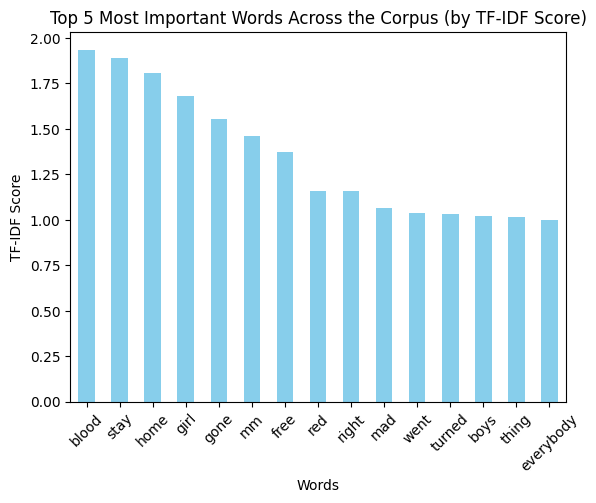

In [6]:
import matplotlib.pyplot as plt

# Bar plot for top words by total TF-IDF score
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Important Words Across the Corpus (by TF-IDF Score)')
plt.ylabel('TF-IDF Score')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.show()

# 2. Text Similarity and TF-IDF

## Example 1: Plagiarism Detector
### Objective:
This example demonstrates how to detect plagiarism by comparing text similarity.
We use TF-IDF vectorization and cosine similarity to identify the most similar document.

### Steps:
1. **Create a dataset** of sample documents.
2. **Convert the documents into TF-IDF vectors** to numerically represent their content.
3. **Implement a function** that takes a new text and finds the most similar document.
4. **Test the detector** with a sample input.

In [7]:
documents = [
    "Climate change is causing severe weather patterns across the globe.",
    "The economic crisis has led to increased unemployment rates worldwide.",
    "Scientists have developed a new vaccine for a rapidly spreading virus.",
    "Artificial intelligence is revolutionizing how businesses operate.",
    "New research suggests that drinking coffee improves cognitive function."
]

# Convert documents into TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_docs = vectorizer.fit_transform(documents)

def detect_plagiarism(new_text):
    """
    Detects the most similar document to the input text.

    **Process:**
    1. Convert the input text into a TF-IDF vector.
    2. Compute cosine similarity between the input and dataset documents.
    3. Retrieve the most similar document based on highest similarity score.

    **Parameters:**
    - new_text (str): The text to compare against the dataset.

    **Returns:**
    - similar_document (str): The most similar document from the dataset.
    - similarity_score (float): The similarity percentage.
    """
    new_vector = vectorizer.transform([new_text]) # Fits a new vector using the tfidf matrix previously built
    similarities = cosine_similarity(new_vector, tfidf_matrix_docs).flatten() # Returns array of cosine similarity for each document compared to new_vector
    top_match = similarities.argmax() # Returns index of most similiar cosine score
    return documents[top_match], similarities[top_match] # Returns the document most similar using index and cosine score based on index

In [8]:
# Classify new text to evaluate
test_doc = "New scientific studies show coffee boosts brain activity." # CHANGE THIS SENTENCE
similar_doc, score = detect_plagiarism(test_doc)

# Return the most similar headlines with label
print(f"Most similar document: {similar_doc}\nSimilarity Score: {score:.2f}")

Most similar document: New research suggests that drinking coffee improves cognitive function.
Similarity Score: 0.46


## Example 2: Fake News Detector
### Objective:
This example demonstrates how to classify news headlines as "real" or "fake" based on textual similarity.
We use TF-IDF vectorization and cosine similarity to compare a given headline to a dataset of labeled headlines.

### Steps:
1. **Create a dataset** of sample headlines labeled as "real" or "fake."
2. **Convert the headlines into TF-IDF vectors** to represent their content numerically.
3. **Implement a function** that takes a new headline and classifies it based on similarity to known headlines.
4. **Test the classifier** with a sample query.

In [9]:
headlines = [
    "Government passes new healthcare law amid protests.",
    "Aliens abducted the president last night, sources claim!",
    "Stock market hits record high as investors cheer economic growth.",
    "Scientists discover a new species in the Amazon rainforest.",
    "World leaders plan to control global economy through secret meetings."
]

headline_labels = ["real", "fake", "real", "real", "fake"]

# Convert news headlines into TF-IDF vectors
tfidf_matrix_news = vectorizer.fit_transform(headlines)

def classify_news(headline, labels):
    """
    Classify a news headline as real or fake based on similarity.

    **Process:**
    1. Convert the input headline into a TF-IDF vector.
    2. Compute cosine similarity between the input and dataset headlines.
    3. Retrieve the most similar headline and assign its label.

    **Parameters:**
    - headline (str): The news headline to classify.

    **Returns:**
    - label (str): Predicted label ("real" or "fake").
    - similar_headline (str): The most similar headline from the dataset.
    """
    headline_vector = vectorizer.transform([headline])  # Convert query to TF-IDF vector
    similarities = cosine_similarity(headline_vector, tfidf_matrix_news).flatten()  # Compute similarity
    top_match = similarities.argmax()  # Identify the most similar headline
    return labels[top_match], headlines[top_match] # Returns 2 different objects: the label and the headline

In [10]:
# Classify new text to evaluate
news_query = "Secret organizations control the world behind the scenes." #### CHANGE THE HEADLINE
label, similar_headline = classify_news(news_query, headline_labels) # Return the label and headline as separate variables

# Return the most similar headlines with label
print(f"Predicted: {label}\nMost similar headline: {similar_headline}")

Predicted: fake
Most similar headline: World leaders plan to control global economy through secret meetings.


## Example 3: Goodreads Recommendations
### Objective:
This example demonstrates how to implement a book search engine using TF-IDF and cosine similarity.
A user inputs a search query, and the system returns the most relevant books based on their descriptions.

### Steps:
1. **Load a dataset** containing book descriptions.
2. **Convert the descriptions into TF-IDF vectors** to numerically represent the text.
3. **Implement a search function** that takes a user query and retrieves the most relevant books.
4. **Test the search engine** by providing example queries.

In [11]:
!pip install kagglehub[pandas-datasets]

In [12]:
# Install dependencies as needed:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "goodreads_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ishikajohari/best-books-10k-multi-genre-data",
  file_path,
).dropna(subset=['Description'])

print("First 5 records:", df.head())

/tmp/ipython-input-2695328691.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'best-books-10k-multi-genre-data' dataset.
First 5 records:    Unnamed: 0                                               Book  \
0           0                              To Kill a Mockingbird   
1           1  Harry Potter and the Philosopher’s Stone (Harr...   
2           2                                Pride and Prejudice   
3           3                          The Diary of a Young Girl   
4           4                                        Animal Farm   

          Author                                        Description  \
0     Harper Lee  The unforgettable novel of a childhood in a sl...   
1   J.K. Rowling  Harry Potter thinks he is an ordinary boy - un...   
2    Jane Austen  Since its immediate success in 1813, Pride and...   
3     Anne Frank  Discovered in the attic in which she spent the...   
4  George Orwell  Librarian's note: There is an Alternate Cover ...   

                                              Genres  Avg_Rat

In [13]:

def search_book(query, df, vectorizer, tfidf_matrix, top_n=5):
    """
    Search for the most relevant books based on a user's query and return the top matches
    with their cosine similarity scores.

    Parameters:
        query (str): The user's search query.
        df (pd.DataFrame): DataFrame containing book data with at least 'Title' and 'Description'.
        vectorizer (TfidfVectorizer): A fitted TfidfVectorizer.
        tfidf_matrix (sparse matrix): TF-IDF matrix computed from the book descriptions.
        top_n (int): Number of top matches to return (default is 5).

    Returns:
        pd.DataFrame: DataFrame with the top matching books' 'Title', 'Description', and 'Score' (cosine similarity).
    """

    # Transform the query using the same vectorizer
    query_vector = vectorizer.transform([query])

    # Compute cosine similarity between the query and each book description
    similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Get the indices of the top matches (sorted in descending order)
    top_indices = similarities.argsort()[-top_n:][::-1]

    # Retrieve the matching rows and add the corresponding cosine similarity scores
    results = df.iloc[top_indices][["Book", "Description"]].copy()
    results["Score"] = similarities[top_indices]

    # Optionally, reset the index for a cleaner output
    return results.reset_index(drop=True)

# Create the list of descriptions and fit the vectorizer
book_descriptions = df["Description"].tolist()
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(book_descriptions)

In [14]:
from tabulate import tabulate

## Run the search query
query = "harry the wizard" # good example of tfidf limitations
result_df = search_book(query, df, vectorizer, tfidf_matrix)

# Option 1: Pretty print with tabulate
print(tabulate(result_df, headers='keys', tablefmt='psql', showindex=False))

# Option 2: Alternatively, print using pandas to_string method
#print(result_df.to_string(index=False))

+-------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------